In [153]:
import pandas as pd
import pycountry_convert as pc

In [154]:
df = pd.read_csv('covid_19_data.csv')

In [155]:
df.drop(columns=['SNo','Province/State','Last Update'],axis=1,inplace=True)
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Mainland China,1.0,0.0,0.0
1,01/22/2020,Mainland China,14.0,0.0,0.0
2,01/22/2020,Mainland China,6.0,0.0,0.0
3,01/22/2020,Mainland China,1.0,0.0,0.0
4,01/22/2020,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
64128,07/14/2020,Mexico,1488.0,145.0,1008.0
64129,07/14/2020,Ukraine,4055.0,140.0,1301.0
64130,07/14/2020,Ukraine,622.0,20.0,521.0
64131,07/14/2020,Mainland China,1270.0,1.0,1267.0


In [156]:
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

In [157]:
df['Continent'] = df['Country/Region'].apply(country_to_continent_code)

In [158]:
map_country = {
    'AF' : 'Africa',
    'EU' : 'Europe',
    'AS' : 'Asia',
    'na' : 'Others',
    'NA' : 'North America',
    'SA' : 'South America',
    'OC' : 'Others'
}

In [159]:
df['Continent'] = df['Continent'].map(map_country)

In [160]:
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Continent
0,01/22/2020,Mainland China,1.0,0.0,0.0,Others
1,01/22/2020,Mainland China,14.0,0.0,0.0,Others
2,01/22/2020,Mainland China,6.0,0.0,0.0,Others
3,01/22/2020,Mainland China,1.0,0.0,0.0,Others
4,01/22/2020,Mainland China,0.0,0.0,0.0,Others
...,...,...,...,...,...,...
64128,07/14/2020,Mexico,1488.0,145.0,1008.0,North America
64129,07/14/2020,Ukraine,4055.0,140.0,1301.0,Europe
64130,07/14/2020,Ukraine,622.0,20.0,521.0,Europe
64131,07/14/2020,Mainland China,1270.0,1.0,1267.0,Others


In [161]:
df['Continent'].value_counts()

Others           17986
Europe           16822
Asia             10186
South America     6708
North America     6229
Africa            6202
Name: Continent, dtype: int64

In [162]:
df1 = df[df['Continent']=='Asia']
df2 = df[df['Continent']=='Europe']
df3 = df[df['Continent']=='Others']
df4 = df[df['Continent']=='Africa']
df5 = df[df['Continent']=='North America']
df6 = df[df['Continent']=='South America']

In [163]:
df1 = df1.groupby('ObservationDate').sum()
df2 = df2.groupby('ObservationDate').sum()
df3 = df3.groupby('ObservationDate').sum()
df4 = df4.groupby('ObservationDate').sum()
df5 = df5.groupby('ObservationDate').sum()
df6 = df6.groupby('ObservationDate').sum()

In [164]:
df1

,Confirmed,Deaths,Recovered
ObservationDate,,,
01/22/2020,7.0,0.0,0.0
01/23/2020,13.0,0.0,0.0
01/24/2020,21.0,0.0,0.0
01/25/2020,30.0,0.0,0.0
01/26/2020,43.0,0.0,3.0
...,...,...,...
07/10/2020,2762219.0,63107.0,1883138.0
07/11/2020,2817258.0,64239.0,1925454.0
07/12/2020,2871757.0,65682.0,1970685.0


In [165]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

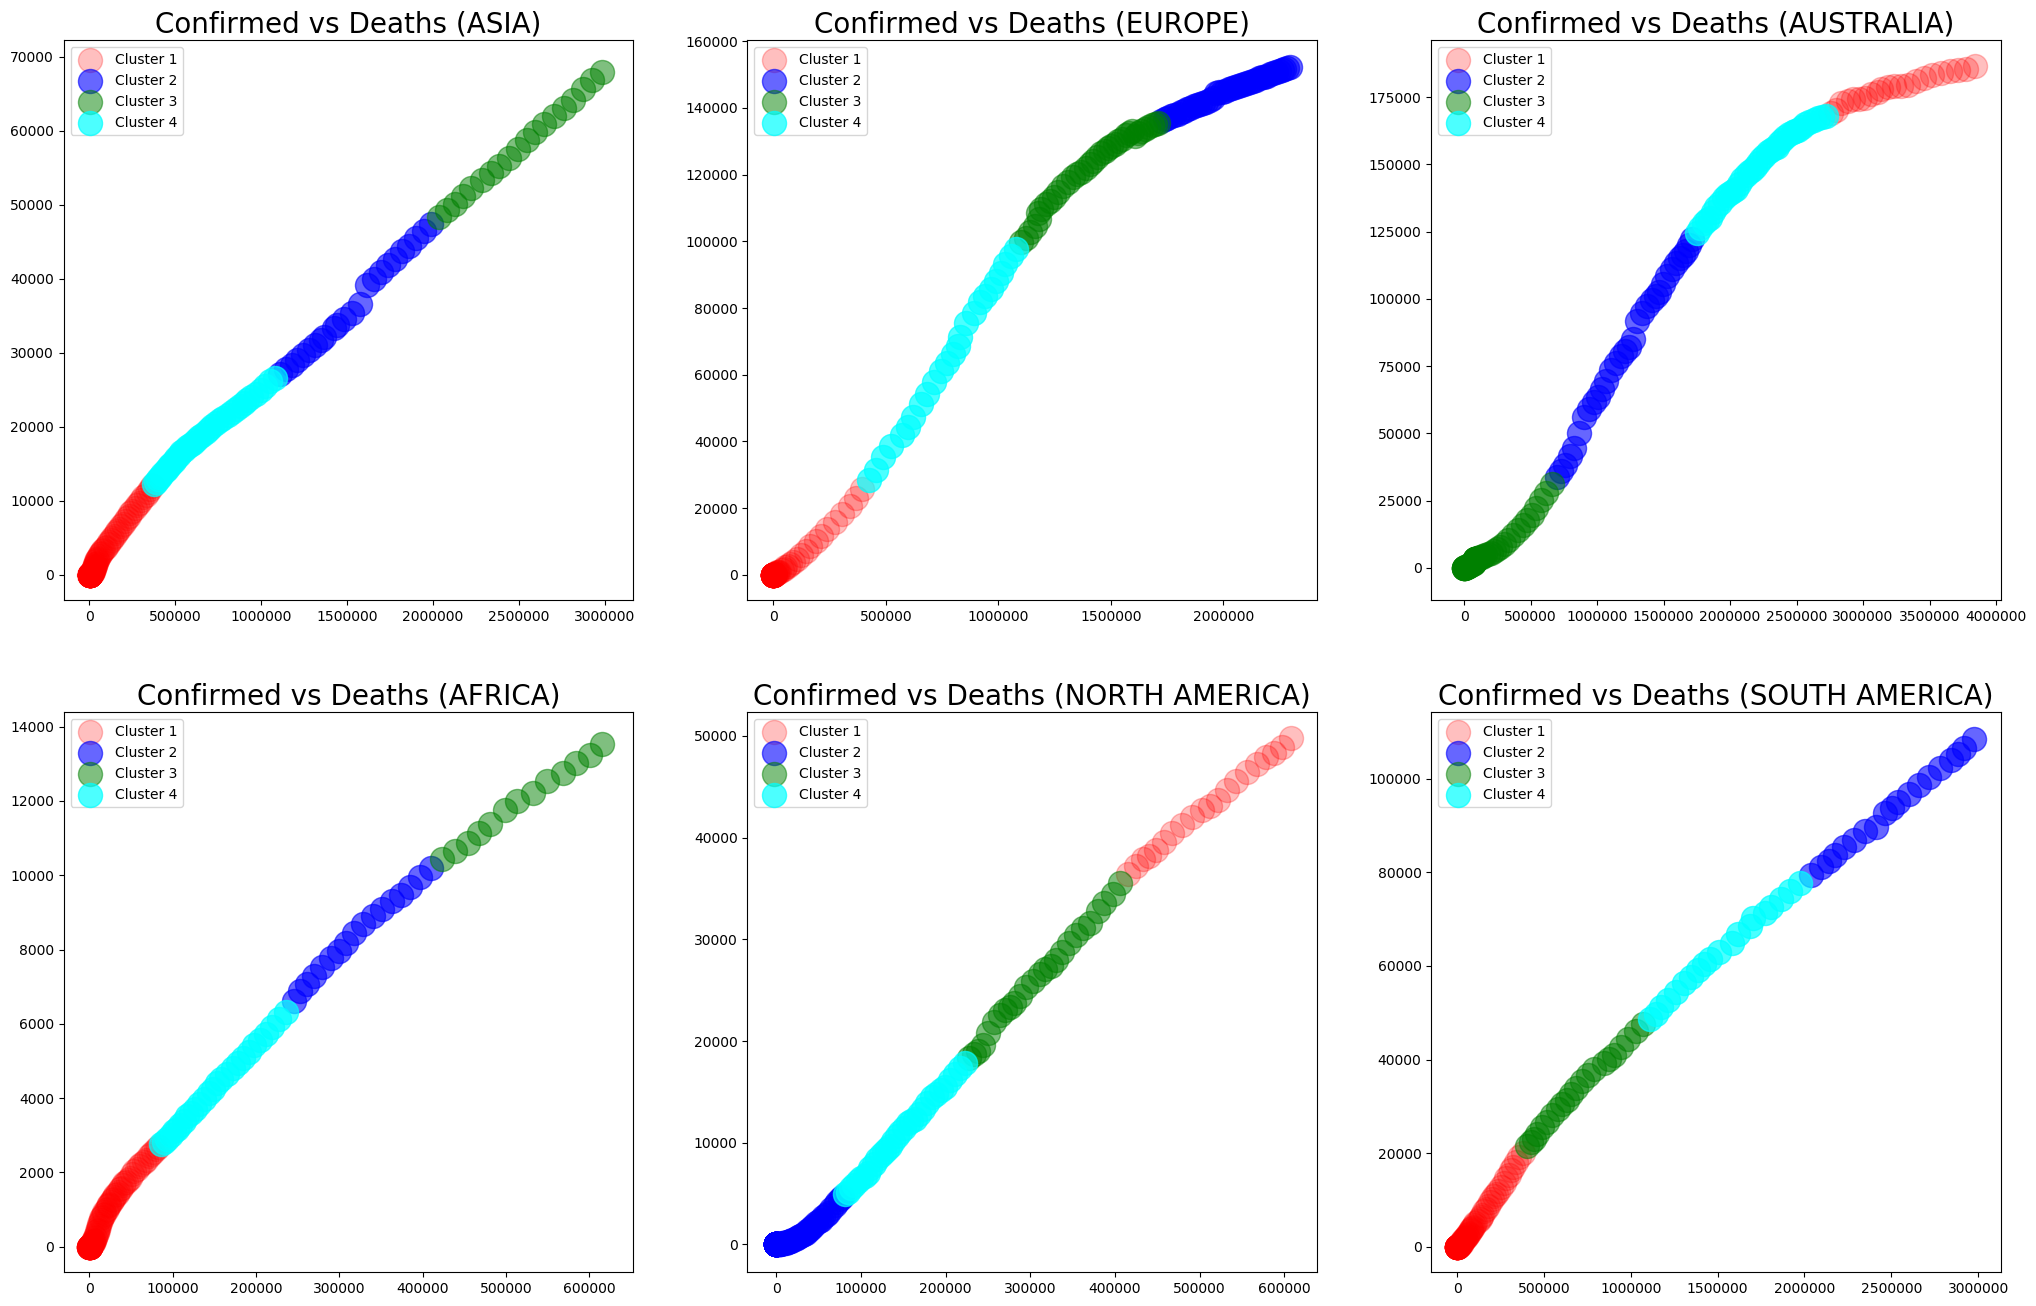

In [167]:
X1 = df1.iloc[:,[0,1]].values.astype('int')

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans.fit_predict(X1)

plt.figure(figsize=(25,16))
# plt.suptitle('Clustering Algorithm',size=15)

plt.subplot(231)
plt.scatter(X1[y_kmeans1 == 0, 0], X1[y_kmeans1 == 0, 1], s = 300, c = 'red', label = 'Cluster 1',alpha=0.25)
plt.scatter(X1[y_kmeans1 == 1, 0], X1[y_kmeans1 == 1, 1], s = 300, c = 'blue', label = 'Cluster 2',alpha=0.6)
plt.scatter(X1[y_kmeans1 == 2, 0], X1[y_kmeans1 == 2, 1], s = 300, c = 'green', label = 'Cluster 3',alpha=0.5)
plt.scatter(X1[y_kmeans1 == 3, 0], X1[y_kmeans1 == 3, 1], s = 300, c = 'cyan', label = 'Cluster 4',alpha=0.7)
plt.title('Confirmed vs Deaths (ASIA)',size=20)
# plt.savefig('Latitude.png')
plt.legend()

X1 = df2.iloc[:,[0,1]].values.astype('int')
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans.fit_predict(X1)
plt.subplot(232)
plt.scatter(X1[y_kmeans1 == 0, 0], X1[y_kmeans1 == 0, 1], s = 300, c = 'red', label = 'Cluster 1',alpha=0.25)
plt.scatter(X1[y_kmeans1 == 1, 0], X1[y_kmeans1 == 1, 1], s = 300, c = 'blue', label = 'Cluster 2',alpha=0.6)
plt.scatter(X1[y_kmeans1 == 2, 0], X1[y_kmeans1 == 2, 1], s = 300, c = 'green', label = 'Cluster 3',alpha=0.5)
plt.scatter(X1[y_kmeans1 == 3, 0], X1[y_kmeans1 == 3, 1], s = 300, c = 'cyan', label = 'Cluster 4',alpha=0.7)
plt.title('Confirmed vs Deaths (EUROPE)',size=20)
# plt.savefig('Latitude.png')
plt.legend()

X1 = df3.iloc[:,[0,1]].values.astype('int')
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans.fit_predict(X1)
plt.subplot(233)
plt.scatter(X1[y_kmeans1 == 0, 0], X1[y_kmeans1 == 0, 1], s = 300, c = 'red', label = 'Cluster 1',alpha=0.25)
plt.scatter(X1[y_kmeans1 == 1, 0], X1[y_kmeans1 == 1, 1], s = 300, c = 'blue', label = 'Cluster 2',alpha=0.6)
plt.scatter(X1[y_kmeans1 == 2, 0], X1[y_kmeans1 == 2, 1], s = 300, c = 'green', label = 'Cluster 3',alpha=0.5)
plt.scatter(X1[y_kmeans1 == 3, 0], X1[y_kmeans1 == 3, 1], s = 300, c = 'cyan', label = 'Cluster 4',alpha=0.7)
plt.title('Confirmed vs Deaths (AUSTRALIA)',size=20)
# plt.savefig('Latitude.png')
plt.legend()

X1 = df4.iloc[:,[0,1]].values.astype('int')
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans.fit_predict(X1)
plt.subplot(234)
plt.scatter(X1[y_kmeans1 == 0, 0], X1[y_kmeans1 == 0, 1], s = 300, c = 'red', label = 'Cluster 1',alpha=0.25)
plt.scatter(X1[y_kmeans1 == 1, 0], X1[y_kmeans1 == 1, 1], s = 300, c = 'blue', label = 'Cluster 2',alpha=0.6)
plt.scatter(X1[y_kmeans1 == 2, 0], X1[y_kmeans1 == 2, 1], s = 300, c = 'green', label = 'Cluster 3',alpha=0.5)
plt.scatter(X1[y_kmeans1 == 3, 0], X1[y_kmeans1 == 3, 1], s = 300, c = 'cyan', label = 'Cluster 4',alpha=0.7)
plt.title('Confirmed vs Deaths (AFRICA)',size=20)
# plt.savefig('Latitude.png')
plt.legend()

X1 = df5.iloc[:,[0,1]].values.astype('int')
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans.fit_predict(X1)
plt.subplot(235)
plt.scatter(X1[y_kmeans1 == 0, 0], X1[y_kmeans1 == 0, 1], s = 300, c = 'red', label = 'Cluster 1',alpha=0.25)
plt.scatter(X1[y_kmeans1 == 1, 0], X1[y_kmeans1 == 1, 1], s = 300, c = 'blue', label = 'Cluster 2',alpha=0.6)
plt.scatter(X1[y_kmeans1 == 2, 0], X1[y_kmeans1 == 2, 1], s = 300, c = 'green', label = 'Cluster 3',alpha=0.5)
plt.scatter(X1[y_kmeans1 == 3, 0], X1[y_kmeans1 == 3, 1], s = 300, c = 'cyan', label = 'Cluster 4',alpha=0.7)
plt.title('Confirmed vs Deaths (NORTH AMERICA)',size=20)
# plt.savefig('Latitude.png')
plt.legend()

X1 = df6.iloc[:,[0,1]].values.astype('int')
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans.fit_predict(X1)
plt.subplot(236)
plt.scatter(X1[y_kmeans1 == 0, 0], X1[y_kmeans1 == 0, 1], s = 300, c = 'red', label = 'Cluster 1',alpha=0.25)
plt.scatter(X1[y_kmeans1 == 1, 0], X1[y_kmeans1 == 1, 1], s = 300, c = 'blue', label = 'Cluster 2',alpha=0.6)
plt.scatter(X1[y_kmeans1 == 2, 0], X1[y_kmeans1 == 2, 1], s = 300, c = 'green', label = 'Cluster 3',alpha=0.5)
plt.scatter(X1[y_kmeans1 == 3, 0], X1[y_kmeans1 == 3, 1], s = 300, c = 'cyan', label = 'Cluster 4',alpha=0.7)
plt.title('Confirmed vs Deaths (SOUTH AMERICA)',size=20)
plt.legend()

plt.savefig('Final.jpg')

In [49]:
plt.style.use('default')

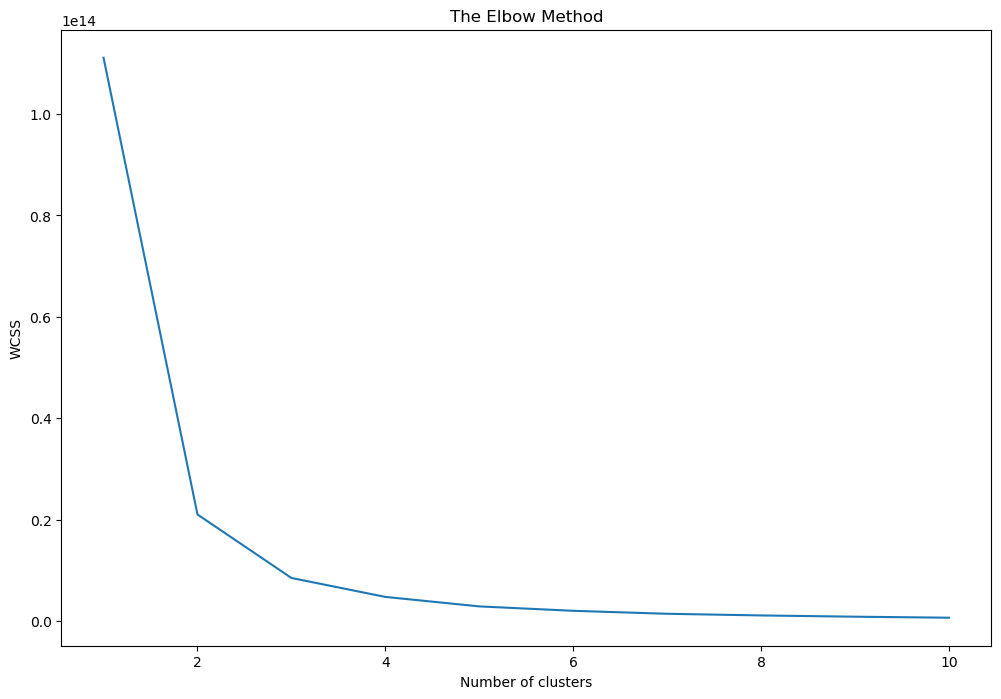

In [50]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow.jpg')

In [57]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(4)

In [58]:
y_gm = gm.fit_predict(X1)

In [59]:
gm.precisions_

array([[[ 1.17082027e-08, -2.54818794e-07],
        [-2.54818794e-07,  5.56569758e-06]],

       [[ 1.06769137e-08, -3.47749594e-07],
        [-3.47749594e-07,  1.13319315e-05]],

       [[ 6.63047290e-08, -1.31165336e-06],
        [-1.31165336e-06,  2.60192818e-05]],

       [[ 3.00706931e-08, -8.23887677e-07],
        [-8.23887677e-07,  2.25861889e-05]]])

In [146]:
X1 = df1.iloc[:,[0,1]].values.astype('int')
y_gm = gm.fit_predict(X1)
cor1 = gm.covariances_
cor1 = cor1.sum()/16
pre1 = gm.precisions_
pre1 = pre1.sum()/16

X1 = df2.iloc[:,[0,1]].values.astype('int')
y_gm = gm.fit_predict(X1)
cor2 = gm.covariances_
cor2 = cor2.sum()/16
pre2 = gm.precisions_
pre2 = pre2.sum()/16

X1 = df3.iloc[:,[0,1]].values.astype('int')
y_gm = gm.fit_predict(X1)
cor3 = gm.covariances_
cor3 = cor3.sum()/16
pre3 = gm.precisions_
pre3 = pre3.sum()/16

X1 = df4.iloc[:,[0,1]].values.astype('int')
y_gm = gm.fit_predict(X1)
cor4 = gm.covariances_
cor4 = cor4.sum()/16
pre4 = gm.precisions_
pre4 = pre4.sum()/16

X1 = df5.iloc[:,[0,1]].values.astype('int')
y_gm = gm.fit_predict(X1)
cor5 = gm.covariances_
cor5 = cor5.sum()/16
pre5 = gm.precisions_
pre5 = pre5.sum()/16

X1 = df6.iloc[:,[0,1]].values.astype('int')
y_gm = gm.fit_predict(X1)
cor6 = gm.covariances_
cor6 = cor6.sum()/16
pre6 = gm.precisions_
pre6 = pre6.sum()/16

In [147]:
list1 = [pre1,pre2,pre3,pre4,pre5,pre6]
list2 = [cor1,cor2,cor3,cor4,cor5,cor6]

In [148]:
list1

[6.172720734779985e-06,
 2.2199387098893628e-05,
 5.602939193059445e-07,
 0.0001326478213726884,
 0.045615075955977656,
 3.4696437775531816e-06]

In [149]:
list2

[17167065555.381054,
 13173596446.923409,
 26710527648.576664,
 681005724.9106705,
 798968809.2478689,
 16598219577.078]

In [150]:
df = pd.DataFrame({'Precision(Average)':list1,'Covariance(Average)':list2})

In [151]:
df.index = ['Asia','Europe','Australia','Africa','North America','South America']

In [152]:
df

,Precision(Average),Covariance(Average)
Asia,6.172721e-06,1.716707e+10
Europe,2.219939e-05,1.317360e+10
Australia,5.602939e-07,2.671053e+10
Africa,1.326478e-04,6.810057e+08
North America,4.561508e-02,7.989688e+08
South America,3.469644e-06,1.659822e+10
